# Introduction to Asymptotic Analysis

## Overview
* What are these talks about?
* What is asymptotic analysis?
* Why study asymptotic analysis?
* Mathematical overview of big-Oh notation
* Examples of some common algorithms, and analysis of their asymptotic complexity

## What are these talks about?
The idea is to give an overview of the analysis of algorithmic complexity, with some examples of real-world algorithms in Python, and their asymptotic behaviour. I will skip over most of the mathematical details, but will introduce $O$ notation for describing runtime complexity.

## Some utility functions for timing and plotting

In [12]:
import time

def time_function(func, params):
    """
    Returns the approximate run-time of a function, in milliseconds
    """
    start_time = time.time()
    result = func(*params)
    end_time = time.time()
    return end_time - start_time

In [13]:
def normalize(x):
    sum_vals = sum(x)
    return [val / sum_vals for val in x]

In [14]:
def plot_O_n(min_size, max_size):
    lengths = range(min_size, max_size)
    times = normalize(lengths)
    seaborn.lineplot(x="Length", y="O(n)", data=pandas.DataFrame({"Length": lengths, "O(n)": times}))

## A motivating example: how long does it take to sort a list of numbers?

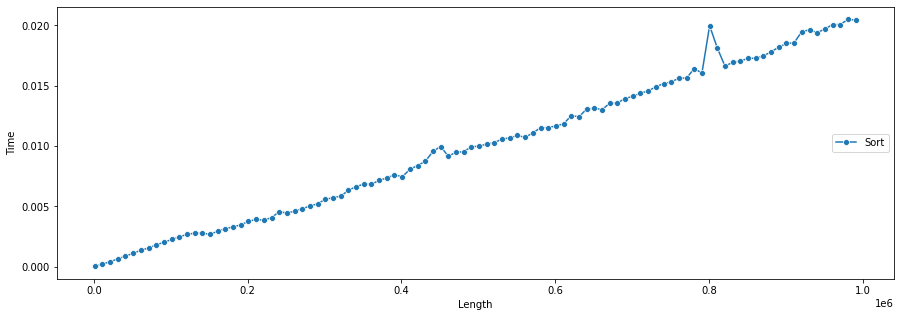

In [30]:
import numpy
import seaborn
import pandas
import matplotlib.pyplot as plt

from math import log
#seaborn.set()

min_size = 1000
max_size = 1000000
increment = 10000

lists = [numpy.random.rand(x) for x in range(min_size, max_size, increment)]
list_lengths = [len(x) for x in lists]

sort_times = [time_function(numpy.sort, (x,)) for x in lists]

O_n = normalize(list_lengths)
O_n_log_n = normalize([x*log(x) for x in list_lengths])

data = pandas.DataFrame({
    "Length": list_lengths, 
    "Time": normalize(sort_times),
    "O(n)": O_n,
    "O(n log n)": O_n_log_n
})

plt.rcParams['figure.figsize'] = [15, 5]

seaborn.lineplot(x="Length", y="Time", data=data, marker='o')
#seaborn.lineplot(x="Length", y="O(n)", data=data)
#seaborn.lineplot(x="Length", y="O(n log n)", data=data)

plt.legend(labels=["Sort", "O(n)", "O(n log n)"], loc="right")